# Connect to TPU

In [1]:
import os
import tensorflow as tf

if os.environ['COLAB_TPU_ADDR']:
  cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
  tf.config.experimental_connect_to_cluster(cluster_resolver)
  tf.tpu.experimental.initialize_tpu_system(cluster_resolver)
  strategy = tf.distribute.TPUStrategy(cluster_resolver)
  print('Using TPU')

elif tf.config.list_physical_devices('GPU'):
  strategy = tf.distribute.MirroredStrategy()
  print('Using GPU')
  
else:
  raise ValueError('Running on CPU is not recommended.')

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.31.31.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.31.31.26:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Using TPU


# Libraries

In [2]:
!pip install transformers
from transformers import DistilBertTokenizerFast, DistilBertModel, DistilBertConfig, TFDistilBertModel

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 43.8 MB/s 
     |████████████████████████████████| 3.3 MB 39.2 MB/s 
     |████████████████████████████████| 596 kB 59.2 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# general
import pickle
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image

# nlp
import re
from collections import Counter
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# ml
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization, Bidirectional, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.metrics import mean_squared_logarithmic_error
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

# stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder

# drive
from google.colab import drive
drive.mount('/content/drive')

In [5]:
path = '/content/drive/MyDrive/Università/5/Advanced ML/progetto/' #'/content/drive/MyDrive/'

# Functions

In [6]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [7]:
def preprocess(df):
  # delete useless id
  df.drop(columns=['train_id', 'test_id'], errors='ignore')

  # rename
  df.rename(columns={'brand_name': 'brand', 
                    'item_description': 'description', 
                    'item_condition_id': 'condition',
                    'category_name': 'category'}, inplace=True)

  # lowercase entire dataframe
  for col in ['name', 'brand', 'category', 'description']:
      df[col] = df[col].str.lower() 

  # split categories
  df[['category1', 'category2', 'category3']] = df['category'].str.split('/', 2, expand=True)

  # log price (if present)
  if 'price' in df.columns:
    df['price'] = np.log(df['price']+1)

  # missing values
  df.fillna('missing', inplace=True)

  # add description length
  df['desc_len'] = df['description'].apply(lambda x: len(x))

  # add brand in name
  df['is_brand_in_name'] = df.apply(lambda x: 1 if x['brand'] in x['name'] else 0, axis=1)

  # clean name and description
  df['description'] = clean_text_feature(df['description'])
  df['name'] = clean_text_feature(df['name'], complete=False)

  # select and re-order columns
  cols = ['name', 'description', 'brand', 'desc_len', 'is_brand_in_name', 'category1', 'category2', 'category3', 'condition', 'shipping']
  if 'price' in df.columns:
    cols.append('price')
  df = df[cols]

  return df

In [8]:
def clean_text_feature(col, complete=True):
    col = col.str.replace('no description yet', 'missing')
    col = col.str.replace('[rm]', '', regex=False)
    if complete:
        col = col.str.replace('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', '', regex=True) 
        col = col.apply(lambda x: remove_stopwords(x))
    col = col.apply(lambda x: remove_emoji(x))
    col = col.apply(lambda x: remove_punctuation(x))
    col = col.apply(lambda x: remove_whitespaces(x))
    col = col.apply(lambda x: correct_sentence(x))
    col = col.apply(lambda x: x if any(c.isalpha() for c in x) else 'missing') # se c'è almeno una lettera
    return col

In [9]:
def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in STOPWORDS])


def remove_punctuation(text):
    trans = str.maketrans(dict.fromkeys(PUNCTUATIONS, ' '))
    return text.translate(trans)


def remove_emoji(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U00002500-\U00002BEF"  # chinese char
                              u"\U00002702-\U000027B0"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001f926-\U0001f937"
                              u"\U00010000-\U0010ffff"
                              u"\u2640-\u2642"
                              u"\u2600-\u2B55"
                              u"\u200d"
                              u"\u23cf"
                              u"\u23e9"
                              u"\u231a"
                              u"\ufe0f"  # dingbats
                              u"\u3030"
                              "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)


def remove_whitespaces(text):
  return " ".join(text.split()).strip()


def correct_sentence(sentence):
  s = re.sub(r"(.)\1+", r'\1\1', sentence)
  # return ' '.join([correction(word) for word in s.split()])
  return s

In [10]:
def columns2categorical(df_train, df_val, df_test, columns):
  for col in columns:
    le = LabelEncoder()
    le.fit(np.hstack([df_train[col], df_val[col], df_test[col]]))
    df_train[col] = le.transform(df_train[col])
    df_val[col] = le.transform(df_val[col])
    df_test[col] = le.transform(df_test[col])
  return df_train, df_val, df_test

In [11]:
def split_df(train, val_size, test_size):
  X_train = train.copy()
  del X_train['price']
  y_train = train[['price']]

  X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=123)

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=456)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [12]:
def read_files():
  X_train = pd.read_csv(path+'X_train.csv')
  X_val = pd.read_csv(path+'X_val.csv')
  X_test = pd.read_csv(path+'X_test.csv')
  y_train = pd.read_csv(path+'y_train.csv')
  y_val = pd.read_csv(path+'y_val.csv')
  y_test = pd.read_csv(path+'y_test.csv')
  return X_train, X_val, X_test, y_train, y_val, y_test

In [13]:
def tokenize_string_columns(df_train, df_val, df_test, columns):
  raw_text = np.hstack([df_train[col] for col in columns])

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(raw_text)

  for df in [df_train, df_val, df_test]:
    for col in columns:
      df['seq_'+col] = tokenizer.texts_to_sequences(df[col])

  return df_train, df_val, df_test

In [14]:
def calc_rmsle(model, X, y):
  groundtruth = np.exp(y)-1
  predictions = np.exp(model.predict(X))-1
  return np.sqrt(mean_squared_log_error(groundtruth, predictions))

In [15]:
def bertTokenize(docs, tokenizer, max_len):
  input_ids = []
  attention_masks = []
  for doc in docs:
    bert_inp = tokenizer.encode_plus(doc, add_special_tokens = True, max_length = max_len, padding = 'max_length', return_attention_mask = True, truncation=True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])
  return np.array(input_ids, dtype='int32'), np.array(attention_masks, dtype='int32')

# Read files

In [16]:
X_train, X_val, X_test, y_train, y_val, y_test = read_files()

# Model 4
test with bert

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1200852, 10) (133429, 10) (148254, 10) (1200852, 1) (133429, 1) (148254, 1)


In [18]:
X_train_namedesc = X_train[['name', 'description']]
X_val_namedesc = X_val[['name', 'description']]
X_test_namedesc = X_test[['name', 'description']]
del X_train['name'], X_train['description'], X_val['name'], X_val['description'], X_test['name'], X_test['description']

In [19]:
# normalize in [0,1]
scaler = MinMaxScaler(feature_range = (0, 1))
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

create ids and masks (dovrebbe andare se non va non starci li piu' di 5 minuti)

In [20]:
max_len_name = 100 #10
max_len_desc = 100 #75

In [ ]:
# bert_tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# ids_name_train, masks_name_train = bertTokenize(X_train_namedesc['name'].tolist(), bert_tokenizer, max_len_name)
# ids_name_val, masks_name_val = bertTokenize(X_val_namedesc['name'].tolist(), bert_tokenizer, max_len_name)
# ids_name_test, masks_name_test = bertTokenize(X_test_namedesc['name'].tolist(), bert_tokenizer, max_len_name)

# ids_desc_train, masks_desc_train = bertTokenize(X_train_namedesc['description'].tolist(), bert_tokenizer, max_len_desc)
# ids_desc_val, masks_desc_val = bertTokenize(X_val_namedesc['description'].tolist(), bert_tokenizer, max_len_desc)
# ids_desc_test, masks_desc_test = bertTokenize(X_test_namedesc['description'].tolist(), bert_tokenizer, max_len_desc)

# ids = {}
# masks = {}
# ids['name'] = {'train': ids_name_train, 'val': ids_name_val, 'test': ids_name_test}
# ids['desc'] = {'train': ids_desc_train, 'val': ids_desc_val, 'test': ids_desc_test}
# masks['name'] = {'train': masks_name_train, 'val': masks_name_val, 'test': masks_name_test}
# masks['desc'] = {'train': masks_desc_train, 'val': masks_desc_val, 'test': masks_desc_test}

# #save pickle

# pickle.dump(ids, open(path+'ids100.file', 'wb'))
# pickle.dump(masks, open(path+'masks100.file', 'wb'))

In [21]:
#load pickle

ids = pickle.load(open(path+'ids.file', 'rb'))
masks = pickle.load(open(path+'masks.file', 'rb'))

In [22]:
epochs = 100
batch_size = 1024
patience = 3
optimizer = 'adam' #tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = mean_squared_logarithmic_error

In [23]:
def create_model():

  # define inputs
  input = Input(shape=(X_train.shape[1],))
  ids_name = Input(shape=(max_len_name,), name='input_token_name', dtype='int32')
  masks_name = Input(shape=(max_len_name,), name='masked_token_name', dtype='int32')
  ids_description = Input(shape=(max_len_desc,), name='input_token_description', dtype='int32')
  masks_description = Input(shape=(max_len_desc,), name='masked_token_description', dtype='int32')

  # 1st branch
  l1 = Dense(256, activation="relu")(input)
  l1 = Dropout(0.2)(l1)
  l1 = Dense(128, activation="relu")(l1)

  # 2nd branch
  embed_name = bert_model.distilbert([ids_name, masks_name])[0]
  lstm_name = Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.2))(embed_name)
  lstm_name = GlobalMaxPooling1D()(lstm_name)

  # 3rd branch
  embed_desc = bert_model.distilbert([ids_description, masks_description])[0]
  lstm_desc = Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.2))(embed_desc)
  lstm_desc = Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.2))(lstm_desc)
  lstm_desc = GlobalMaxPooling1D()(lstm_desc)

  layer_concat = concatenate([l1, lstm_name, lstm_desc])

  dropout = Dropout(0.2)(layer_concat)
  dense = Dense(64, activation='relu')(dropout)
  dense = Dropout(0.2)(dense)
  dense = Dense(1, activation='linear')(dense)
  model = Model(inputs=[input, ids_name, masks_name, ids_description, masks_description], outputs=dense)

  return model



with strategy.scope():
  config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
  config.output_hidden_states = False
  bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
  bert_model.trainable = False

  model = create_model()
  model.compile(optimizer=optimizer, 
                steps_per_execution = 32,
                loss=loss)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_token_name (InputLayer)  [(None, 100)]        0           []                               
                                                                                                  
 masked_token_name (InputLayer)  [(None, 100)]       0           []                               
                                                                                                  
 input_token_description (Input  [(None, 100)]       0           []                               
 Layer)                                                                                           
                                                                                                  
 masked_token_description (Inpu  [(None, 100)]       0           []                           

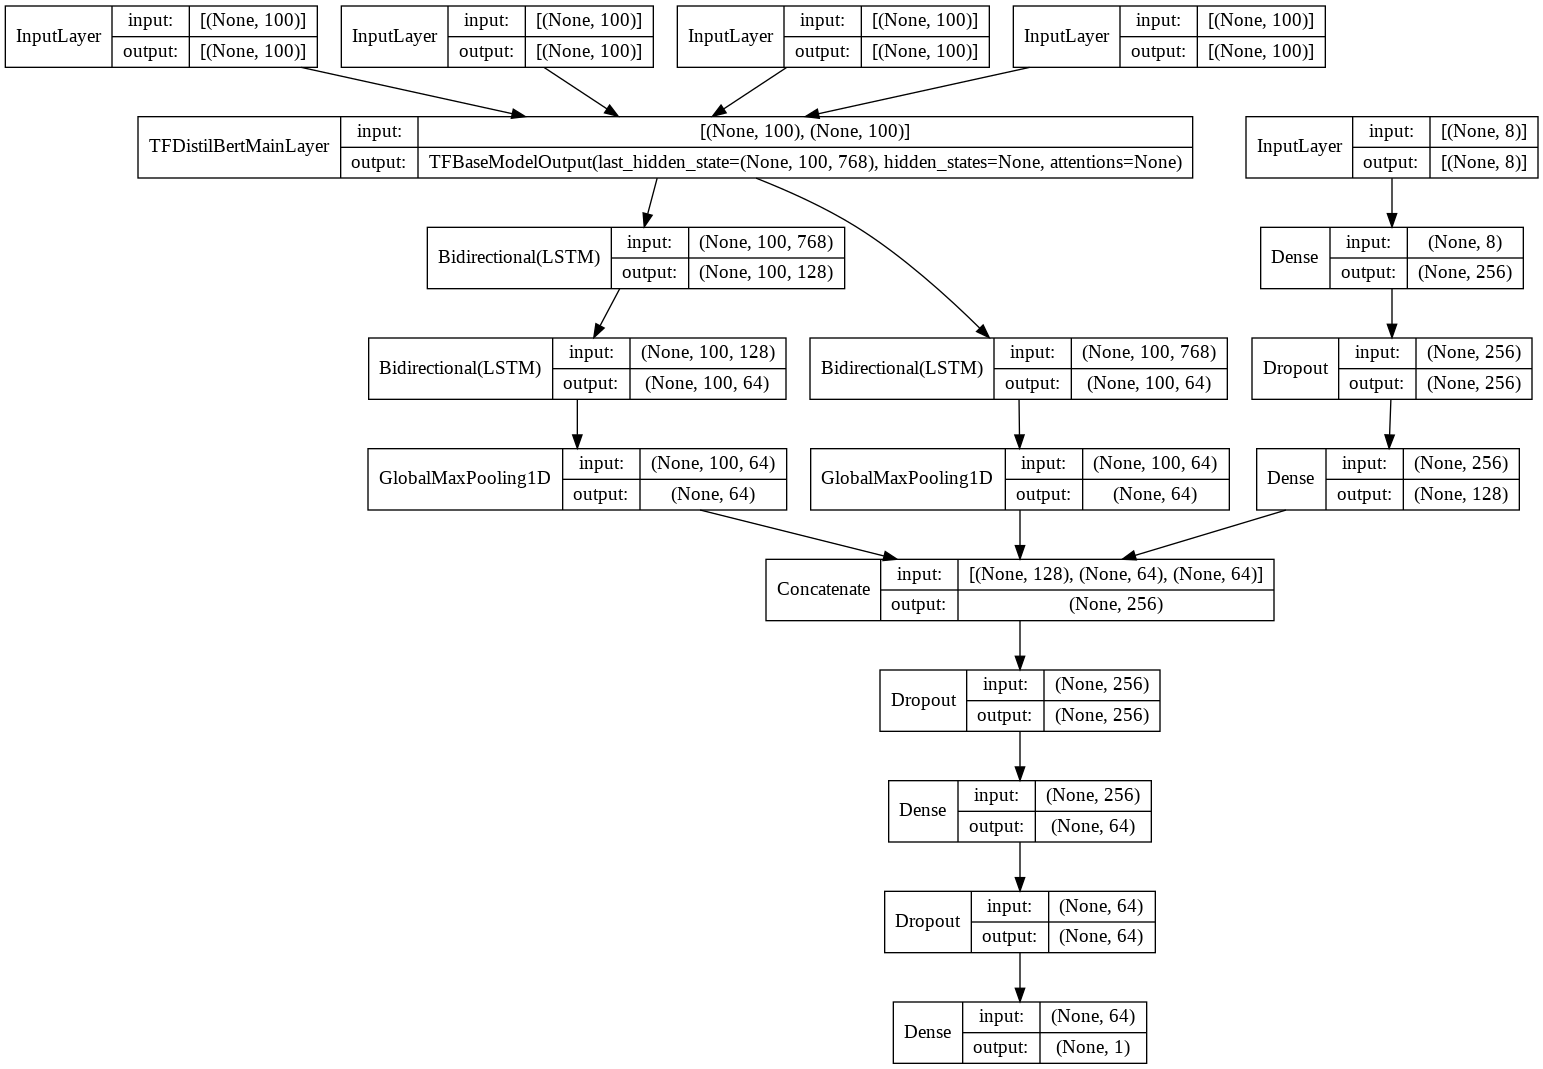

In [25]:
plot_model(model, show_layer_names=False, show_shapes=True)

In [ ]:
stop_callback = EarlyStopping(monitor='val_loss', patience=patience)
save_callback = ModelCheckpoint(path+'best_modelv2.h5', save_best_only=True)

net_hist = model.fit([X_train, ids['name']['train'], masks['name']['train'], ids['desc']['train'], masks['desc']['train']], 
                     y_train, 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     validation_data=([X_val, ids['name']['val'], masks['name']['val'], ids['desc']['val'], masks['desc']['val']], y_val), 
                     callbacks=[stop_callback, save_callback])

Epoch 1/100


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 8) dtype=float64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_24:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_32:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_40:0' shape=(None, 1) dtype=float64>]


Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'while/Const:0' shape=() dtype=int32>, <tf.Tensor 'while/cond/Identity:0' shape=(None, 8) dtype=float64>, <tf.Tensor 'while/cond/Identity_8:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'while/cond/Identity_16:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'while/cond/Identity_24:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'while/cond/Identity_32:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'while/cond/Identity_40:0' shape=(None, 1) dtype=float64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 8) dtype=float64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_24:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_32:0' shape=(None, 100) dtype=int32>, <tf.Tensor 

1173/1173 [==============================] - ETA: 0s - loss: 0.0332

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 8) dtype=float64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_24:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_32:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_40:0' shape=(None, 1) dtype=float64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'while/Const:0' shape=() dtype=int32>, <tf.Tensor 'while/cond/Identity:0' shape=(None, 8) dtype=float64>, <tf.Tensor 'while/cond/Identity_8:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'while/cond/Identity_16:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'while/cond/Identity_24:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'while/cond/Identity_32:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'while/cond/Identity_40:0' shape=(None, 1) dtype=float64>]


1173/1173 [==============================] - 478s 407ms/step - loss: 0.0332 - val_loss: 0.0270
Epoch 2/100
1173/1173 [==============================] - 349s 298ms/step - loss: 0.0247 - val_loss: 0.0202
Epoch 3/100
1173/1173 [==============================] - 349s 297ms/step - loss: 0.0227 - val_loss: 0.0196
Epoch 4/100
1173/1173 [==============================] - 349s 297ms/step - loss: 0.0212 - val_loss: 0.0194
Epoch 5/100
1173/1173 [==============================] - 348s 296ms/step - loss: 0.0200 - val_loss: 0.0183
Epoch 6/100
1173/1173 [==============================] - 349s 298ms/step - loss: 0.0190 - val_loss: 0.0174
Epoch 7/100
1173/1173 [==============================] - 348s 297ms/step - loss: 0.0183 - val_loss: 0.0171
Epoch 8/100
1173/1173 [==============================] - 344s 293ms/step - loss: 0.0177 - val_loss: 0.0171
Epoch 9/100
1173/1173 [==============================] - 348s 297ms/step - loss: 0.0171 - val_loss: 0.0163
Epoch 10/100
1173/1173 [=========================

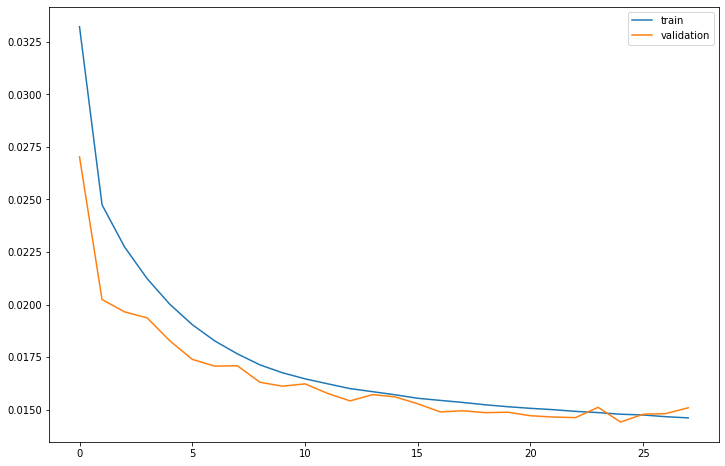

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(net_hist.history['loss'], label='train')
plt.plot(net_hist.history['val_loss'], label='validation')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model = keras.models.load_model(path+'best_modelv2.h5')

In [ ]:
with strategy.scope():
  rmsle = calc_rmsle(model, [X_test, ids['name']['test'], masks['name']['test'], ids['desc']['test'], masks['desc']['test']], y_test)
  print('rmsle:', np.round(rmsle,5))

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 8) dtype=float64>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_16:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_24:0' shape=(None, 100) dtype=int32>, <tf.Tensor 'cond/Identity_32:0' shape=(None, 100) dtype=int32>]


rmsle: 0.47012
